# BottomUpParceLiNGAM | Comparison of HSIC and F-correlation

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)

['1.26.1', '2.1.3', '0.20.1', '1.8.3']


## Test data
First, we generate a causal structure with 7 variables. Then we create a dataset with 6 variables from x0 to x5, with x6 being the latent variable for x2 and x3.

In [2]:
np.random.seed(1000)

x6 = np.random.uniform(size=1000)
x3 = 2.0*x6 + np.random.uniform(size=1000)
x0 = 0.5*x3 + np.random.uniform(size=1000)
x2 = 2.0*x6 + np.random.uniform(size=1000)
x1 = 0.5*x0 + 0.5*x2 + np.random.uniform(size=1000)
x5 = 0.5*x0 + np.random.uniform(size=1000)
x4 = 0.5*x0 - 0.5*x2 + np.random.uniform(size=1000)

# The latent variable x6 is not included.
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T, columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

X.head()

,x0,x1,x2,x3,x4,x5
0,1.505949,2.667827,2.029420,1.463708,0.615387,1.157907
1,1.379130,1.721744,0.965613,0.801952,0.919654,0.957148
2,1.436825,2.845166,2.773506,2.533417,-0.616746,0.903326
3,1.562885,2.205270,1.080121,1.192257,1.240595,1.411295
4,1.940721,2.974182,2.140298,1.886342,0.451992,1.770786


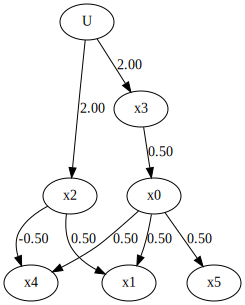

In [3]:
m = np.array([[0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0],
              [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0],
              [0.5, 0.0,-0.5, 0.0, 0.0, 0.0, 0.0],
              [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'U'])

## Causal Discovery by HSIC

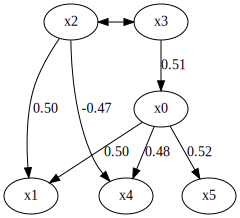

In [4]:
model = lingam.BottomUpParceLiNGAM(independence='hsic')
model.fit(X)
dot = make_dot(model.adjacency_matrix_)
display(dot)

## Causal Discovery by F-correlation

### threshold=0.15

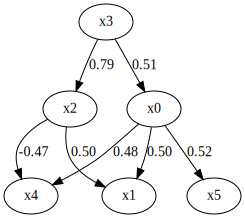

### threshold=0.14

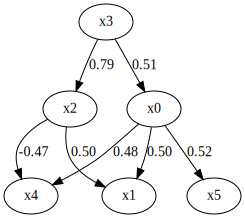

### threshold=0.13

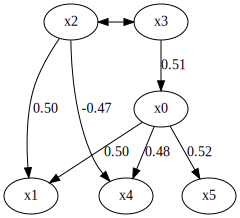

### threshold=0.12

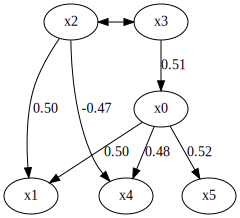

### threshold=0.11

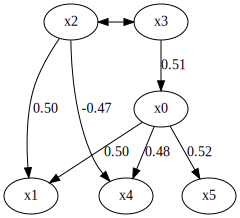

### threshold=0.10

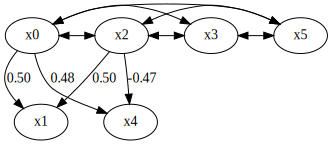

### threshold=0.09

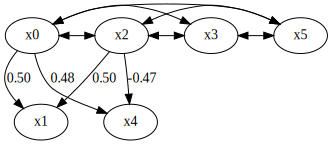

### threshold=0.08

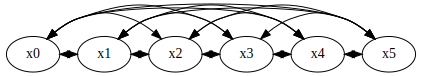

### threshold=0.07

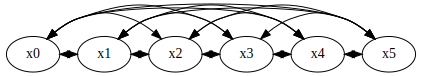

### threshold=0.06

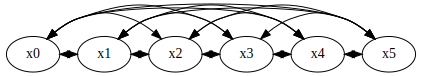

### threshold=0.05

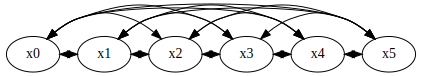

In [5]:
for ind_corr in np.linspace(0.15, 0.05, 11):
    display(Markdown(f"### threshold={ind_corr:.2f}"))
    model = lingam.BottomUpParceLiNGAM(independence='fcorr', ind_corr=ind_corr)
    model.fit(X)
    dot = make_dot(model.adjacency_matrix_)
    display(dot)